# **Data Analysis**

**Libraries import**

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mutual_info_score, root_mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

In [5]:
data = pd.read_csv('/content/sp_500_risk_rating.csv')
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [6]:
data.shape

(503, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 502 non-null    object 
 3   Sector                  502 non-null    object 
 4   Industry                502 non-null    object 
 5   Full Time Employees     498 non-null    object 
 6   Description             502 non-null    object 
 7   Total ESG Risk score    430 non-null    float64
 8   Environment Risk Score  430 non-null    float64
 9   Governance Risk Score   430 non-null    float64
 10  Social Risk Score       430 non-null    float64
 11  Controversy Level       430 non-null    object 
 12  Controversy Score       403 non-null    float64
 13  ESG Risk Percentile     430 non-null    object 
 14  ESG Risk Level          430 non-null    ob

In [ ]:
data.describe().round(2)

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.00,430.00,430.00,430.00,403.00
mean,21.53,5.74,6.73,9.07,2.01
std,6.89,5.09,2.21,3.66,0.79
min,7.10,0.00,3.00,0.80,1.00
25%,16.40,1.80,5.30,6.70,1.00
50%,21.05,4.05,6.10,8.90,2.00
75%,26.00,8.95,7.68,11.20,2.00
max,41.70,25.00,19.40,22.50,5.00


# 1. Data Cleaning

### 1.1 Data Formatting

In [8]:
#Using lowercase letters with underscores improves consistency,
#and reduces errors by avoiding spaces and case sensitivity issues

data.columns = data.columns.str.lower().str.replace(' ', '_')

categorical = list(data.dtypes[data.dtypes == 'object'].index)
for c in categorical:
    data[c] = data[c].str.lower().str.replace(' ', '_')

data.head(5)

,symbol,name,address,sector,industry,full_time_employees,description,total_esg_risk_score,environment_risk_score,governance_risk_score,social_risk_score,controversy_level,controversy_score,esg_risk_percentile,esg_risk_level
0,enph,"enphase_energy,_inc.","47281_bayside_parkway\nfremont,_ca_94538\nunit...",technology,solar,"3,157","enphase_energy,_inc.,_together_with_its_subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emn,eastman_chemical_company,"200_south_wilcox_drive\nkingsport,_tn_37662\nu...",basic_materials,specialty_chemicals,"14,000",eastman_chemical_company_operates_as_a_special...,25.3,12.8,6.6,5.8,moderate_controversy_level,2.0,50th_percentile,medium
2,dpz,domino's_pizza_inc.,"30_frank_lloyd_wright_drive\nann_arbor,_mi_481...",consumer_cyclical,restaurants,"6,500","domino's_pizza,_inc.,_through_its_subsidiaries...",29.2,10.6,6.3,12.2,moderate_controversy_level,2.0,66th_percentile,medium
3,day,"dayforce,_inc.","3311_east_old_shakopee_road\nminneapolis,_mn_5...",technology,software_-_application,"9,084","dayforce_inc.,_together_with_its_subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dva,davita_inc.,"2000_16th_street\ndenver,_co_80202\nunited_states",healthcare,medical_care_facilities,"70,000",davita_inc._provides_kidney_dialysis_services_...,22.6,0.1,8.4,14.1,moderate_controversy_level,2.0,38th_percentile,medium


### 1.2 Handling missing values

In [9]:
#Checking for missing values
data.isna().sum()

,0
symbol,0
name,0
address,1
sector,1
industry,1
full_time_employees,5
description,1
total_esg_risk_score,73
environment_risk_score,73
governance_risk_score,73


In [10]:
# Drop rows where ESG scores are missing
data.dropna(subset=['total_esg_risk_score', 'environment_risk_score', 'governance_risk_score', 'social_risk_score'], inplace=True)

In [11]:
categorical = data.select_dtypes(include='object').columns
numeric= data.select_dtypes(include='number').columns

data[numeric] =  data[numeric].fillna(data[numeric].median())
# Drop rows where categorical columns are missing values
data.dropna(subset=categorical, inplace=True)

data.isna().sum()

,0
symbol,0
name,0
address,0
sector,0
industry,0
full_time_employees,0
description,0
total_esg_risk_score,0
environment_risk_score,0
governance_risk_score,0


# 2. EDA

### **Sector ESG Risk Distribution**

- In this section, I am visualizing the distribution of ESG risk scores across different market sectors. Unlike a standard bar chart that only shows the average, I chose a Boxenplot to capture the 'spread' and outliers within each industry. This helps identify which sectors have a consistent risk profile and which ones have highly diverse company behaviors, which is a key insight for our model's feature engineering

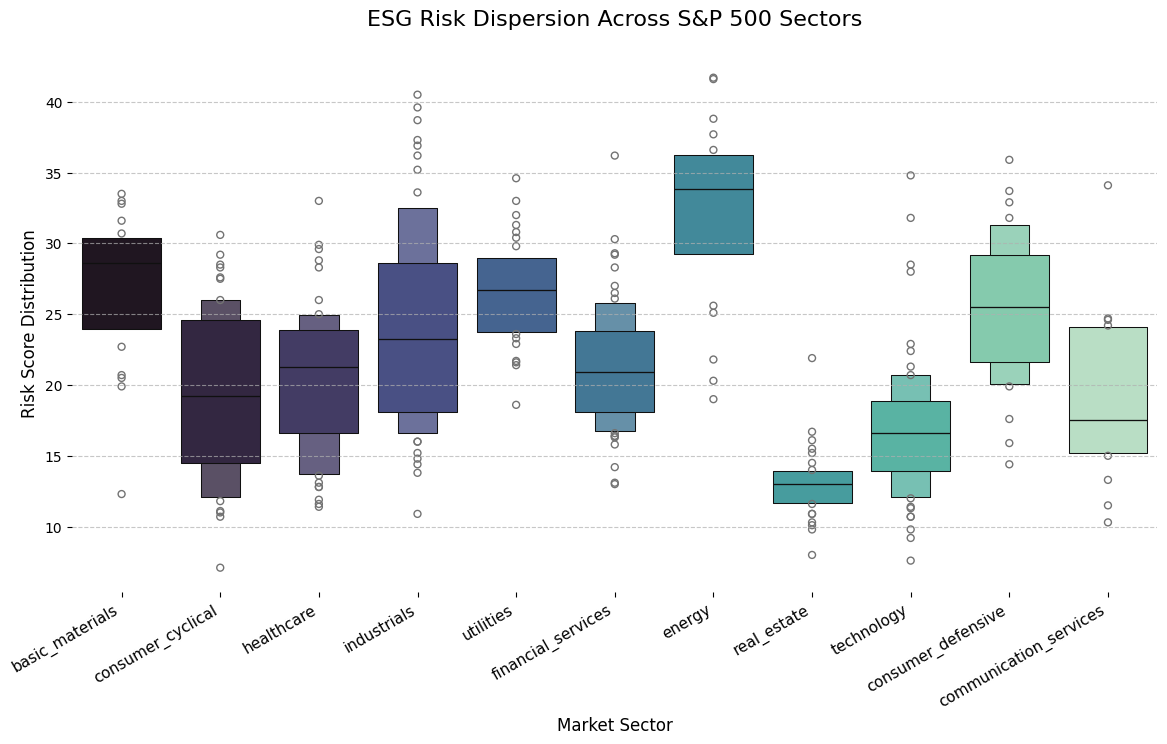

In [12]:
def analyze_sector_distribution(df):
    """
    Refactored Sector Analysis: Focuses on distribution rather than just the mean.
    """
    plt.figure(figsize=(14, 7))

    # Using a Boxenplot for a more 'modern' look than a standard Boxplot
    # It shows more quantiles and looks very professional
    sns.boxenplot(data=df, x='sector', y='total_esg_risk_score', palette='mako')

    # Customizing the 'feel'
    plt.xticks(rotation=30, ha='right', fontsize=11)
    plt.title('ESG Risk Dispersion Across S&P 500 Sectors', fontsize=16, pad=20)
    plt.xlabel('Market Sector', fontsize=12)
    plt.ylabel('Risk Score Distribution', fontsize=12)
    sns.despine(left=True, bottom=True) # Removes the 'box' around the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

analyze_sector_distribution(data)

###**Risk Pillar Breakdown (The Stacked Bar)**

- This chart decomposes the Total ESG Risk Score into its three core components: Environmental, Social, and Governance pillars. By using a stacked bar format, I can compare the 'composition' of risk across sectors. The goal is to see if specific industries are driven by one dominant pillar (like Environment in Energy) or if the risk is evenly distributed, helping us understand which sub-scores are the most influential predictors."

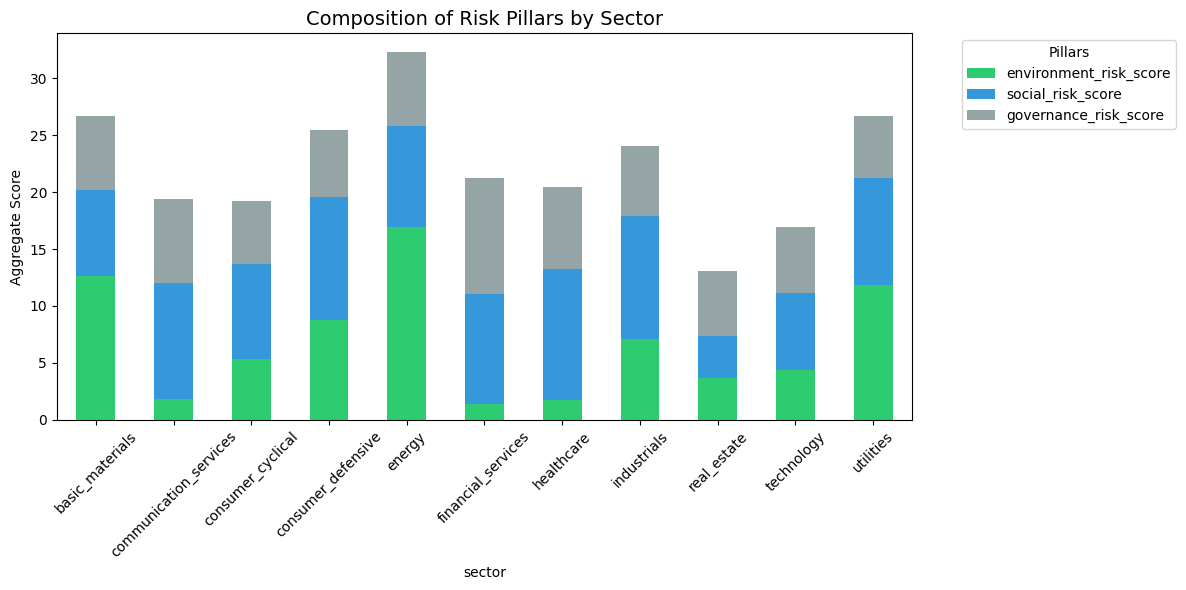

In [14]:
# 1. Prepare the data (Top 10 most risky sectors for clarity)
pillar_means = data.groupby('sector')[['environment_risk_score', 'social_risk_score', 'governance_risk_score']].mean()

# 2. Plotting a Stacked Bar
pillar_means.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#2ecc71', '#3498db', '#95a5a6'])

plt.title('Composition of Risk Pillars by Sector', fontsize=14)
plt.legend(title='Pillars', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Aggregate Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Top 10 Low-Risk Industries" (Lollipop Chart)**

- While the previous section looked at broad Sectors, this analysis drills down into specific Industries to identify the top 10 'ESG Leaders' (those with the lowest average risk). I opted for a Lollipop Chart here because it offers a cleaner aesthetic than a traditional bar chart, making it easier to focus on the individual data points. This helps us verify if certain industries consistently perform well, which could be a significant 'safe' cluster for our prediction model

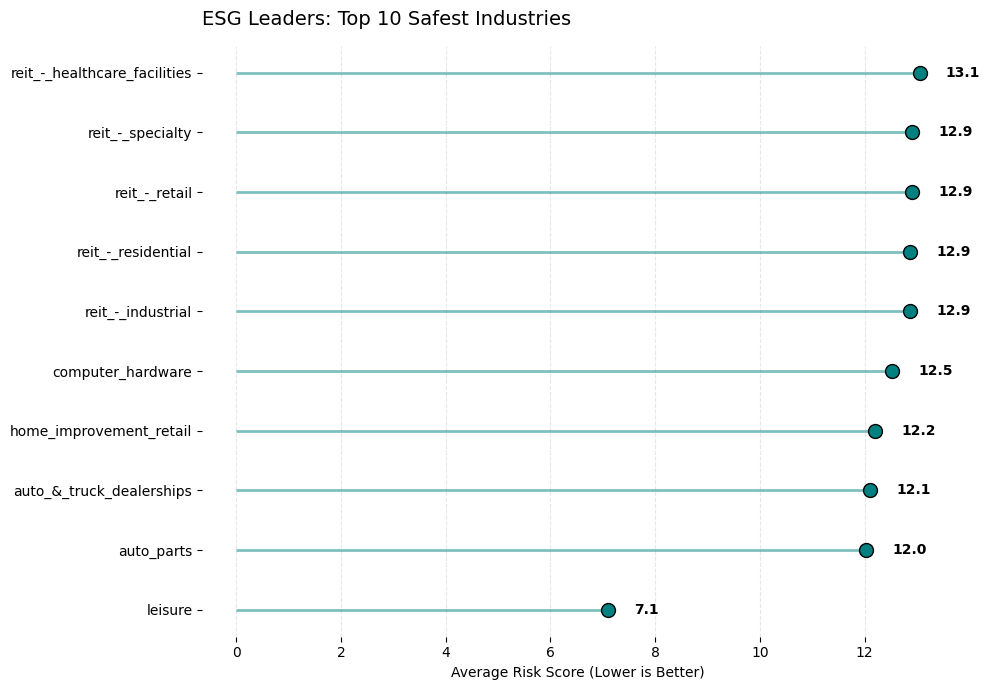

In [16]:
def plot_top_performing_industries(df, n=10):

    # Group and calculate mean
    industry_data = df.groupby('industry')['total_esg_risk_score'].mean().nsmallest(n).reset_index()

    # Setup the plot
    plt.figure(figsize=(10, 7))

    # Create the 'sticks' of the lollipops
    plt.hlines(y=industry_data['industry'], xmin=0, xmax=industry_data['total_esg_risk_score'],
               color='teal', alpha=0.5, linewidth=2)

    # Create the 'heads' of the lollipops
    plt.plot(industry_data['total_esg_risk_score'], industry_data['industry'], "o",
             markersize=10, color='teal', markeredgecolor='black')

    # Add data labels
    for i, score in enumerate(industry_data['total_esg_risk_score']):
        plt.text(score + 0.5, i, f"{score:.1f}", fontweight='bold', va='center')

    plt.title(f'ESG Leaders: Top {n} Safest Industries', loc='left', fontsize=14, pad=15)
    plt.xlabel('Average Risk Score (Lower is Better)')
    plt.ylabel('') # Industry labels are clear enough
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

plot_top_performing_industries(data)



---
--> The Leisure industry ranks the lowest, indicating it presents a more favorable risk profile for investors seeking sustainable and responsible investment options

### **Company Leaders Analysis**

- In this step, I transition from industry-level analysis to identifying specific individual company leaders within the S&P 500. I used a gradient-colored horizontal bar chart to rank the top 10 firms with the lowest total risk scores. This visualization allows us to see the 'elite' group of companies that set the benchmark for high Environmental, Social, and Governance standards, helping us understand the characteristics of the lowest-risk data points our model will encounter.

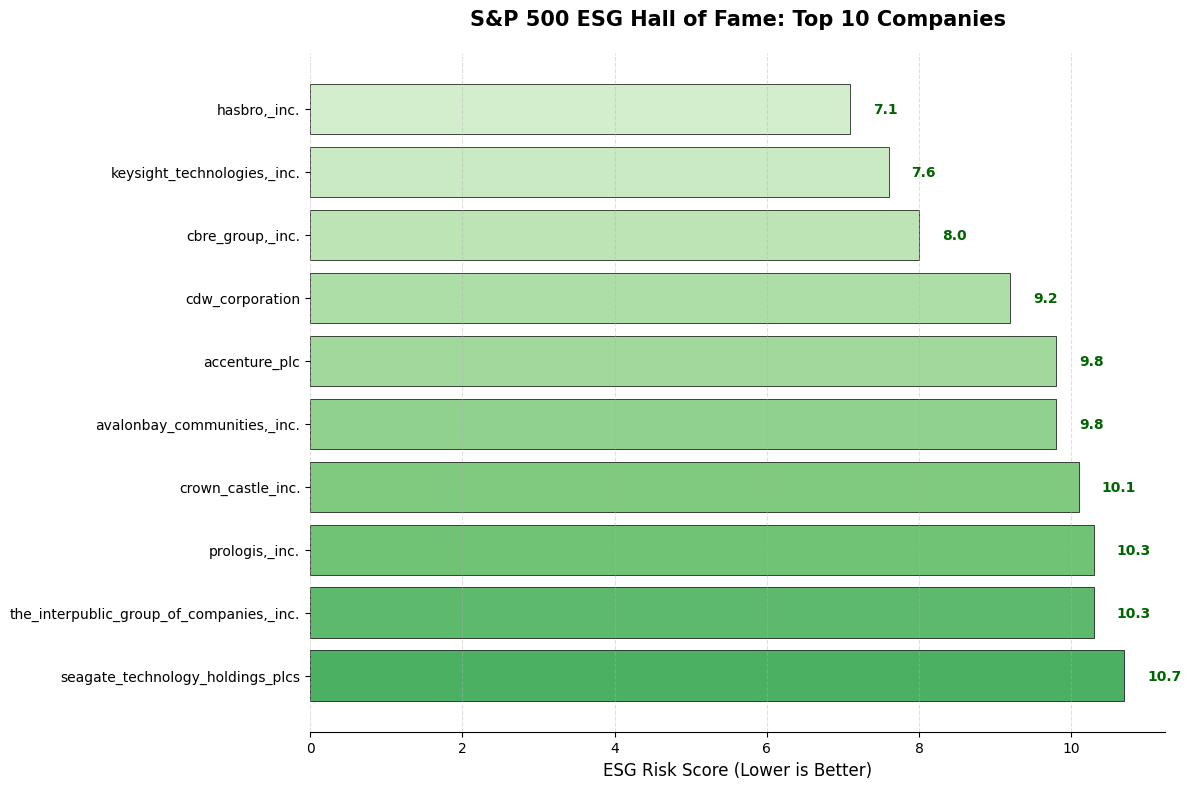

In [17]:
def plot_esg_company_leaders(df, top_n=10):

    # Select the top N performers
    leaders = df.nsmallest(top_n, 'total_esg_risk_score').sort_values('total_esg_risk_score', ascending=False)

    # Create a color map based on the score (deeper green for better/lower scores)
    colors = plt.cm.Greens_r(np.linspace(0.4, 0.8, top_n))

    plt.figure(figsize=(12, 8))
    bars = plt.barh(leaders['name'], leaders['total_esg_risk_score'], color=colors, edgecolor='black', linewidth=0.5)

    # Add styling
    plt.title(f'S&P 500 ESG Hall of Fame: Top {top_n} Companies', fontsize=15, fontweight='bold', pad=20)
    plt.xlabel('ESG Risk Score (Lower is Better)', fontsize=12)
    plt.ylabel('')

    # Clean up the chart
    sns.despine(left=True)
    plt.grid(axis='x', linestyle='--', alpha=0.4)

    # Add score labels at the end of each bar with a neat background box
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}',
                 va='center', fontweight='bold', color='darkgreen')

    plt.tight_layout()
    plt.show()

plot_esg_company_leaders(data)

## **Controversy Levels**

Controversy level in ESG refers to how serious or intense public or legal issues related to a company are. It is a measure of how much negative attention or risk a company faces due to events like environmental damage, social conflicts, or governance failures.

In [18]:
data = data[data['controversy_level'] != 'none_controversy_level']
data.controversy_level.value_counts()

,count
controversy_level,
moderate_controversy_level,199
low_controversy_level,106
significant_controversy_level,82
high_controversy_level,11
severe_controversy_level,2


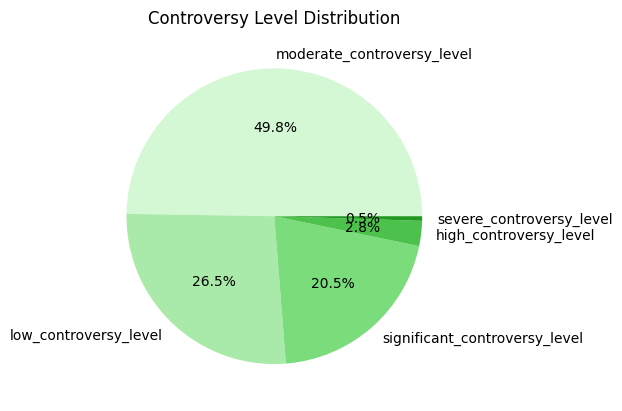

In [19]:
custom_palette = ['#d4f7d4', '#a9e9a9', '#7adc7a', '#4cc24c', '#219921', '#107110']

plt.pie(data.controversy_level.value_counts(), labels=data.controversy_level.value_counts().index, autopct='%1.1f%%', colors=custom_palette)
plt.title('Controversy Level Distribution')
plt.show()


---
--> This graph presents a pie chart showing the distribution of controversy levels.
* We find that 26.5% of controversies are low, meaning the company has few or minor issues that do not significantly affect its reputation or operations.
* Moderate controversy levels, representing 49.8%, indicate noticeable issues that could pose some risk or concern.
* High or severe controversies, although representing a smaller percentage, indicate serious problems with significant negative impacts on the company’s environment, society, or governance, potentially harming its reputation, finances, or legal standing.

## **Percentile Analysis**

In the context of Environmental, Social, and Governance (ESG) risks, percentile rankings serve as a valuable measure for investors who aim to compare companies within similar scopes of performance. The percentile analysis indicates a company’s relative ranking in terms of ESG risk compared to its peers.

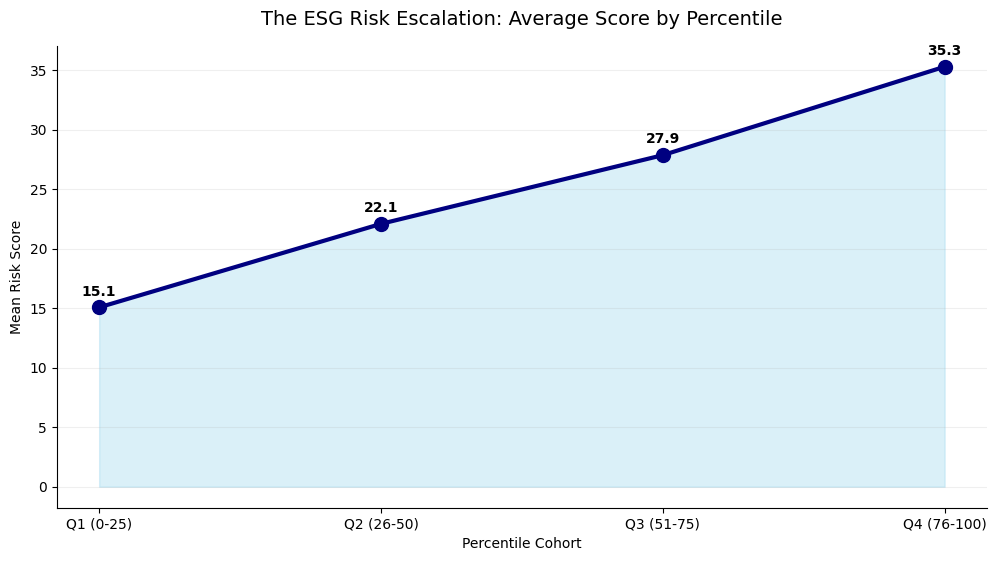

In [22]:
def plot_percentile_risk_trend(df):
    """
    Refactored Percentile Analysis: Uses a Point Plot and Area Fill
    to visualize the progression of risk across percentile groups.
    """
    # Preprocessing (Refactored logic)
    df['percentile_val'] = df['esg_risk_percentile'].astype(str).str.extract('(\d+)').astype(float)

    bins = [0, 25, 50, 75, 100]
    labels = ['Q1 (0-25)', 'Q2 (26-50)', 'Q3 (51-75)', 'Q4 (76-100)']
    df['percentile_group'] = pd.cut(df['percentile_val'], bins=bins, labels=labels, right=False)

    group_data = df.groupby('percentile_group')['total_esg_risk_score'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))

    # 1. Fill the area under the curve for a 'modern' look
    plt.fill_between(group_data['percentile_group'], group_data['total_esg_risk_score'],
                     color="skyblue", alpha=0.3)

    # 2. Add the trend line and markers
    plt.plot(group_data['percentile_group'], group_data['total_esg_risk_score'],
             marker='o', linestyle='-', color='navy', linewidth=3, markersize=10)

    # Adding Labels and Styling
    for i, score in enumerate(group_data['total_esg_risk_score']):
        plt.text(i, score + 1, f'{score:.1f}', ha='center', fontweight='bold')

    plt.title('The ESG Risk Escalation: Average Score by Percentile', fontsize=14, pad=15)
    plt.ylabel('Mean Risk Score')
    plt.xlabel('Percentile Cohort')
    plt.grid(axis='y', alpha=0.2)
    sns.despine()
    plt.show()

plot_percentile_risk_trend(data)

* The data shows that companies in the 0-25th percentile group have an average ESG risk score of about 15.1 dicating relatively low risks and potential for stable, compliant investments. In contrast, those in the 76-100th percentile group have a higher average score of around 35.3, suggesting greater exposure to reputational risks. Investors can use this information to align investments with their ESG risk tolerance and goals.

## **Energy Sector ESG Imbalance**

- In this section, I moved away from general sector averages to perform a deep-dive into the Energy Sector. I specifically analyzed the 'Risk Gap' between Environmental and Social pillars using a Dumbbell Plot. This allows us to see which energy companies have an unbalanced risk profile—for instance, those managing social factors well but struggling with high environmental impact. This 'imbalance' is a unique feature that might help our model distinguish between different types of risk management strategies within the same industry.

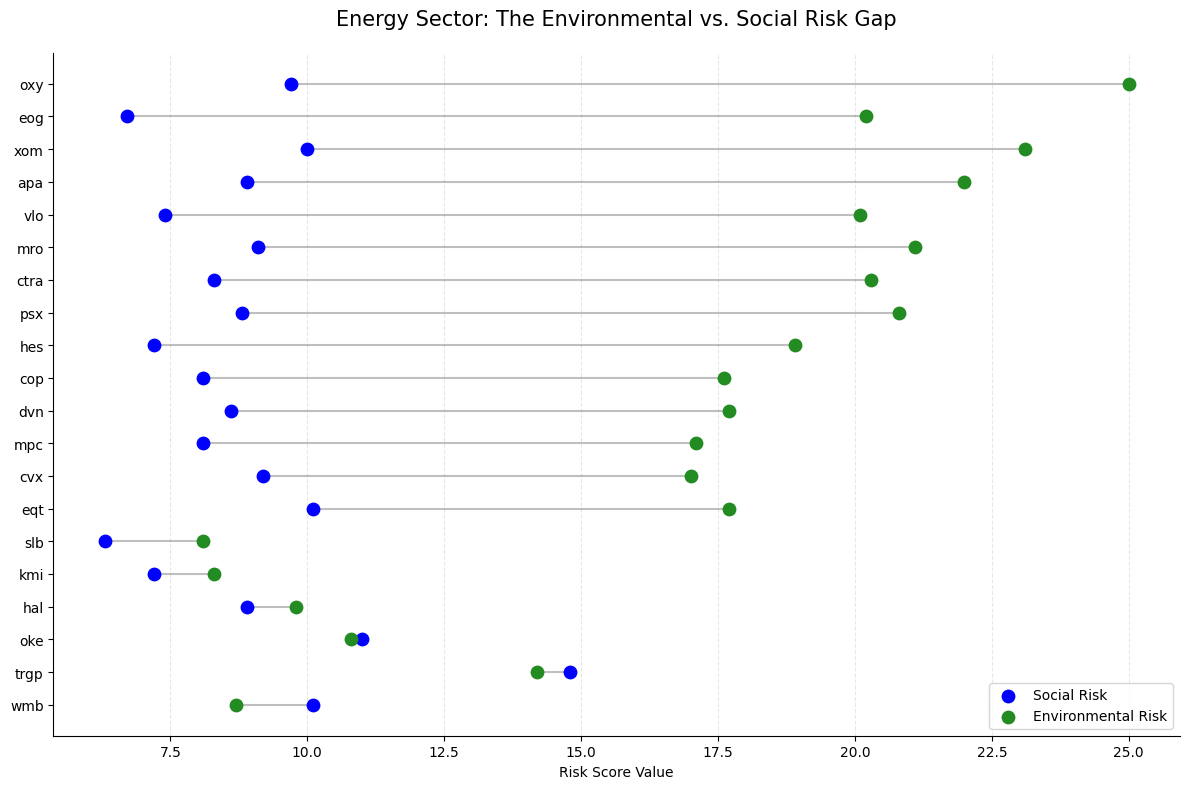

In [25]:
def plot_energy_risk_gap(df):

    # 1. Filter for Energy
    energy_data = df[df['sector'] == 'energy'].copy()

    # 2. Calculate the 'Gap' (Environmental vs Social)
    # A positive gap means Environmental risk is much higher than Social risk
    energy_data['es_gap'] = energy_data['environment_risk_score'] - energy_data['social_risk_score']
    energy_data = energy_data.sort_values('es_gap')

    # 3. Visualization: Using a Slope/Dumbbell-style approach
    plt.figure(figsize=(12, 8))

    # Draw the line connecting the two points
    plt.hlines(y=energy_data['symbol'], xmin=energy_data['social_risk_score'],
               xmax=energy_data['environment_risk_score'], color='grey', alpha=0.5)

    # Plot the individual points
    plt.scatter(energy_data['social_risk_score'], energy_data['symbol'],
                color='blue', label='Social Risk', s=80, zorder=3)
    plt.scatter(energy_data['environment_risk_score'], energy_data['symbol'],
                color='forestgreen', label='Environmental Risk', s=80, zorder=3)

    plt.title('Energy Sector: The Environmental vs. Social Risk Gap', fontsize=15, pad=20)
    plt.xlabel('Risk Score Value')
    plt.legend(loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine()

    plt.tight_layout()
    plt.show()

plot_energy_risk_gap(data)

The 25th to 75th percentile range (from 8.6 to 11.4) suggests that a majority of the companies in this sector have scores within this range, and are thus comparatively aligned in terms of governance risk. Lower scores could represent potential low-risk investment opportunities, whereas higher scores might flag higher governance risks that warrant careful scrutiny.

In [36]:
import plotly.express as px

def plot_esg_sunburst(df):

    # We take a subset so the plot isn't too crowded
    sub_df = df.sample(100)

    fig = px.sunburst(sub_df,
                      path=['sector', 'industry'],
                      values='total_esg_risk_score',
                      color='total_esg_risk_score',
                      color_continuous_scale='RdYlGn_r', # Red to Green reversed
                      title="Interactive ESG Risk Hierarchy")

    fig.show()

plot_esg_sunburst(data)

# 3. Feature Importance

### 3.1 Mutual information score :
* helps identify how much knowing one variable reduces uncertainty about another. It’s widely used to find important features in data, improve model predictions, and understand variable relationships. It’s especially valuable for selecting the most informative variables when building machine learning models.


In [37]:
y = data['total_esg_risk_score']

#creating feature importance method using mutual information score
def mutual_info_esg_score(series):
  return mutual_info_score(series, y)

In [38]:
selected_categorical = ['full_time_employees','esg_risk_percentile','industry','sector','esg_risk_level','controversy_level']
mutual_info = data[selected_categorical].apply(mutual_info_esg_score)
mutual_info.sort_values(ascending=False)
#Listing mutual_info_score from lowest to highest
#selecting the most informative features

,0
full_time_employees,4.859205
esg_risk_percentile,4.228500
industry,3.605629
sector,1.658284
esg_risk_level,1.072491
controversy_level,0.698398


* Features such as full-time employees, esg risk percentile and industry have higher mutual information scores, indicating they have a stronger influence on predicting the target variable, ESG risk score. In essence, the higher the mutual information score, the more important the feature is for predicting ESG risk.

### 3.2 Correlation matrix

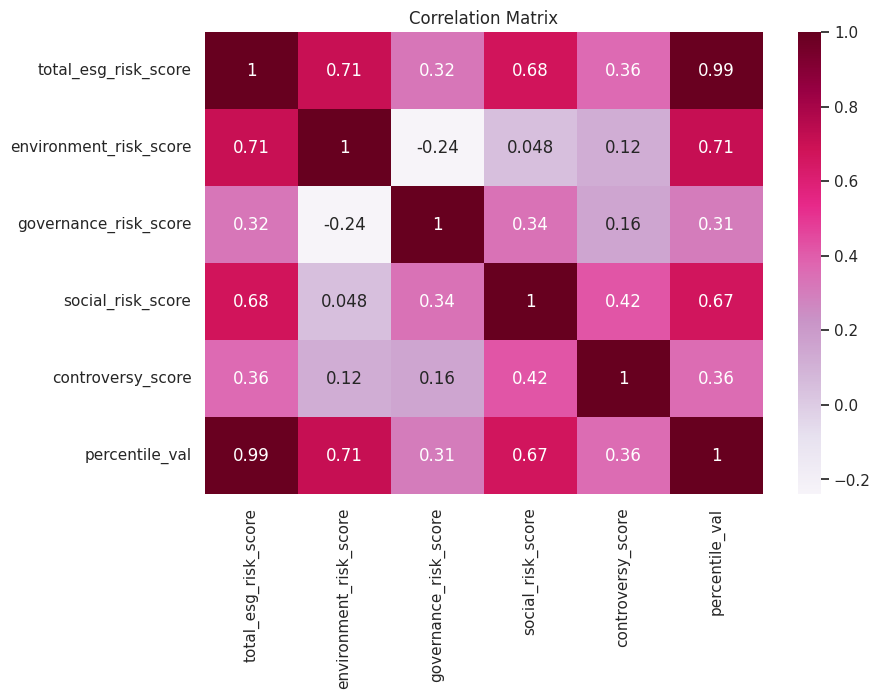

In [39]:
numeric= data.select_dtypes(include='number').columns
corr_matrix = data[numeric].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd')
plt.title('Correlation Matrix')
plt.show()

# 4. Data Preprocessing:

In [46]:
#Check if 'esg_risk_percentile' is object type and clean it
if data['esg_risk_percentile'].dtype == 'object':
    data['esg_risk_percentile'] = data['esg_risk_percentile'].str.extract('(\d+)').astype(float)

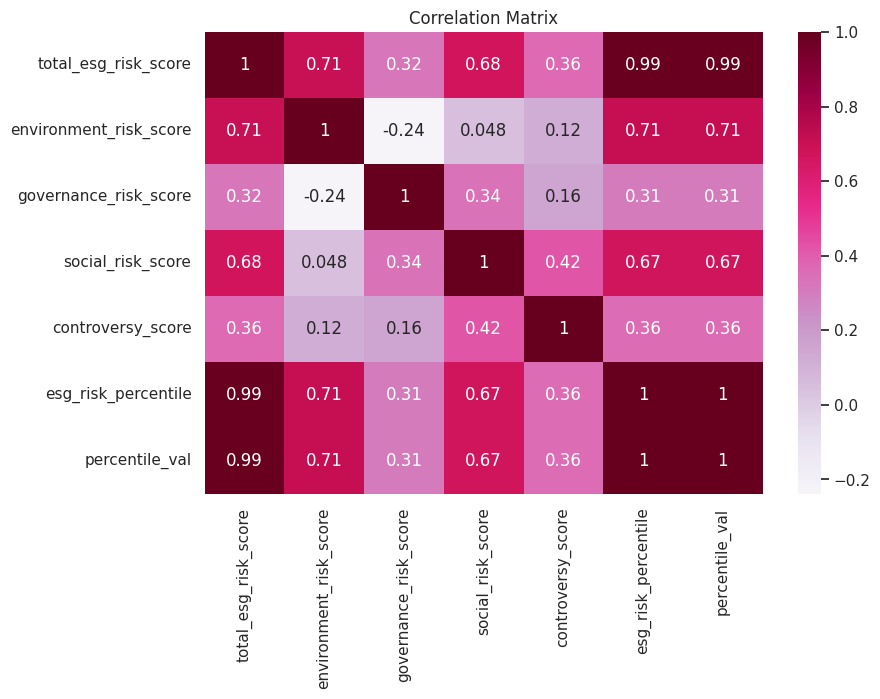

In [47]:
numeric= data.select_dtypes(include='number').columns
corr_matrix = data[numeric].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd')
plt.title('Correlation Matrix')
plt.show()

### -> We are removing esg_risk_percentile because it will most likely cause overfitting

* ### Feature Selection
* ### One-Hot-Encoding
* ### Data Split

In [48]:
# Define features and target
categorical_columns = ['sector', 'industry', 'controversy_level', 'esg_risk_level']
numerical_columns = ['environment_risk_score', 'governance_risk_score', 'social_risk_score', 'controversy_score']
features = categorical_columns + numerical_columns
target = 'total_esg_risk_score'

# Convert dataframe rows to list of dicts
data_features = data[features].to_dict(orient='records')

# Initialize DictVectorizer and transform
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(data_features)

y = data[target].values

# Split data
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

In [43]:
len(X_train), len(X_val), len(X_test)

(240, 80, 80)

# 4. Training & Evaluation

## 4.1 Parameter Tuning

### 4.1.1 Random Forest Regressor

`n_estimators`  

Number of decision trees in the forest

In [49]:
n_estimators = range(10, 210, 10)# from 10 to 210 with 20 steps
rmse_list = []
r2_list = []

for n in n_estimators:
  model = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)

# Evaluate the model
  rmse_value = root_mean_squared_error(y_val, y_pred)
  r2_value = r2_score(y_val, y_pred)

  rmse_list.append(rmse_value)
  r2_list.append(r2_value)

  print(f"n_estimators: {n} : RMSE: {rmse_value:.5f} : R squared: {r2_value:.5f}")

n_estimators: 10 : RMSE: 1.69613 : R squared: 0.94692
n_estimators: 20 : RMSE: 1.73313 : R squared: 0.94458
n_estimators: 30 : RMSE: 1.63926 : R squared: 0.95042
n_estimators: 40 : RMSE: 1.68554 : R squared: 0.94758
n_estimators: 50 : RMSE: 1.68474 : R squared: 0.94763
n_estimators: 60 : RMSE: 1.73229 : R squared: 0.94463
n_estimators: 70 : RMSE: 1.69083 : R squared: 0.94725
n_estimators: 80 : RMSE: 1.66331 : R squared: 0.94895
n_estimators: 90 : RMSE: 1.66259 : R squared: 0.94900
n_estimators: 100 : RMSE: 1.66362 : R squared: 0.94894
n_estimators: 110 : RMSE: 1.68039 : R squared: 0.94790
n_estimators: 120 : RMSE: 1.68009 : R squared: 0.94792
n_estimators: 130 : RMSE: 1.68773 : R squared: 0.94744
n_estimators: 140 : RMSE: 1.68977 : R squared: 0.94732
n_estimators: 150 : RMSE: 1.69652 : R squared: 0.94690
n_estimators: 160 : RMSE: 1.68229 : R squared: 0.94778
n_estimators: 170 : RMSE: 1.71220 : R squared: 0.94591
n_estimators: 180 : RMSE: 1.71037 : R squared: 0.94602
n_estimators: 190 :

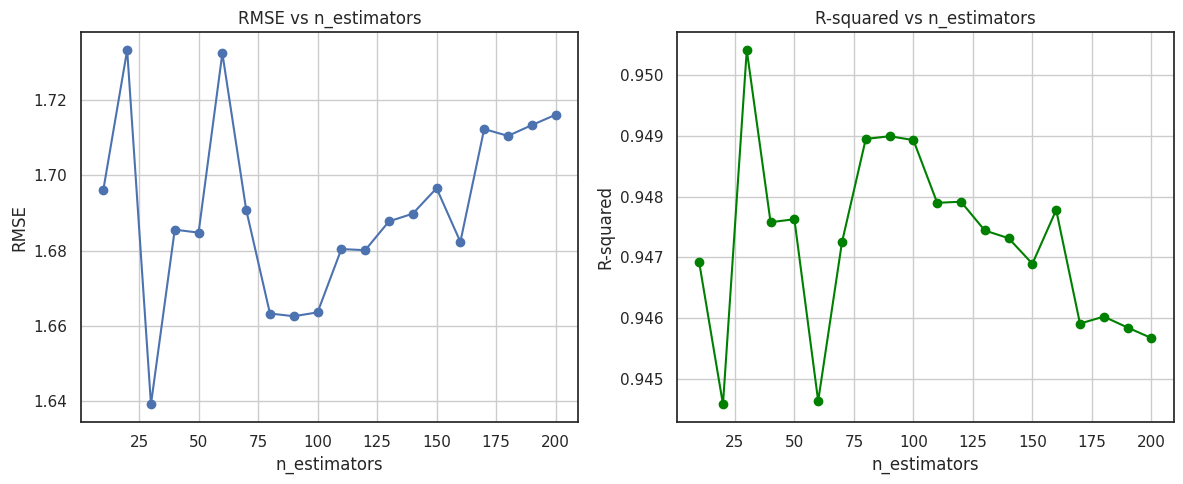

In [50]:
# Plot RMSE vs n_estimators
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, rmse_list, marker='o')
plt.title('RMSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)

# Plot R-squared vs n_estimators
plt.subplot(1, 2, 2)
plt.plot(n_estimators, r2_list, marker='o', color='green')
plt.title('R-squared vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best n_estimators --> 25



`max_depth`

Maximum depth of each tree -> Limits overfitting

In [51]:
max_depth = range(1,21,1)
rmse_list = []
r2_list = []

for d in max_depth:
  model = RandomForestRegressor(n_estimators=25, max_depth=d, n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)

# Evaluate the model
  rmse = root_mean_squared_error(y_val, y_pred)
  r_squared = r2_score(y_val, y_pred)
  rmse_list.append(rmse)
  r2_list.append(r_squared)

  print(f"max_depth: {d} : RMSE: {rmse:.5f}: R squared : {r_squared}")

max_depth: 1 : RMSE: 4.76135: R squared : 0.581712275656201
max_depth: 2 : RMSE: 3.43845: R squared : 0.7818577361314735
max_depth: 3 : RMSE: 2.68809: R squared : 0.866677998918407
max_depth: 4 : RMSE: 2.23379: R squared : 0.9079335648644042
max_depth: 5 : RMSE: 2.02108: R squared : 0.924632799663724
max_depth: 6 : RMSE: 1.82760: R squared : 0.9383723122543466
max_depth: 7 : RMSE: 1.71472: R squared : 0.9457497934867536
max_depth: 8 : RMSE: 1.67064: R squared : 0.9485030629011042
max_depth: 9 : RMSE: 1.70821: R squared : 0.9461606703808598
max_depth: 10 : RMSE: 1.66774: R squared : 0.9486820032052322
max_depth: 11 : RMSE: 1.67420: R squared : 0.9482837527664224
max_depth: 12 : RMSE: 1.66396: R squared : 0.9489143143854026
max_depth: 13 : RMSE: 1.67253: R squared : 0.948386395342875
max_depth: 14 : RMSE: 1.66833: R squared : 0.9486455171097978
max_depth: 15 : RMSE: 1.64598: R squared : 0.9500124772478816
max_depth: 16 : RMSE: 1.64440: R squared : 0.9501079800123401
max_depth: 17 : RMSE:

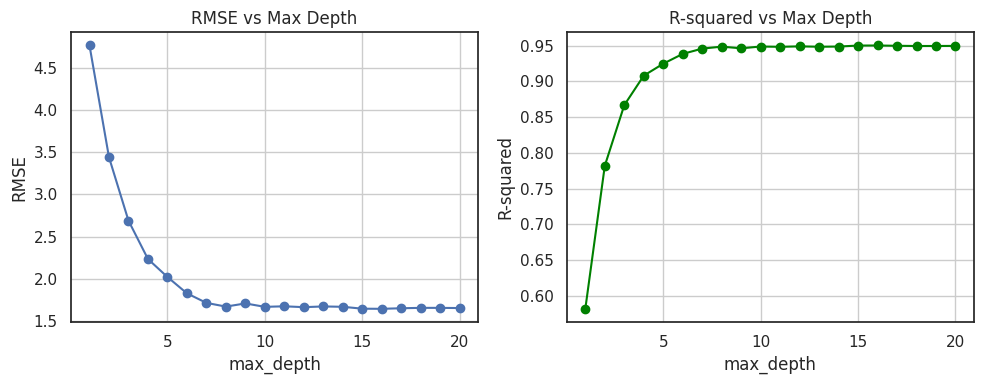

In [52]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth, rmse_list, marker='o')
plt.title('RMSE vs Max Depth')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_depth, r2_list, marker='o', color='green')
plt.title('R-squared vs Max Depth')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best max_depth --> 15

Final RandomForestRegressor

In [53]:
rf_model = RandomForestRegressor(n_estimators=25, max_depth=15,min_samples_leaf=1, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=25, n_jobs=-1, random_state=42)

Learning Curves

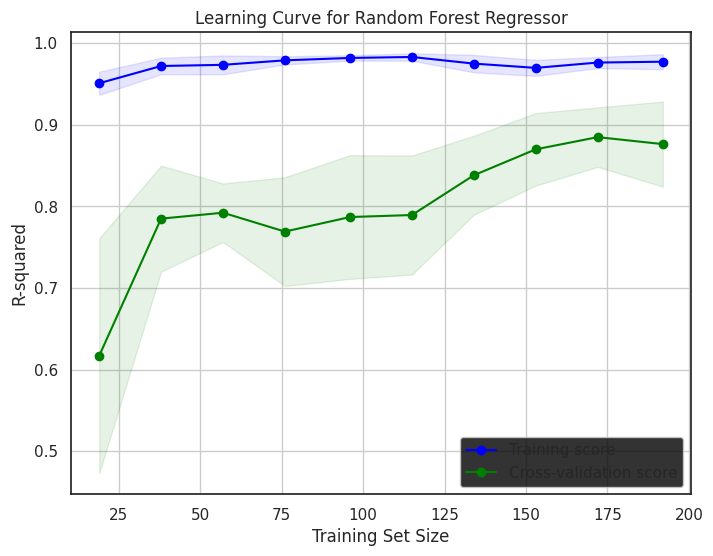

In [54]:
from sklearn.model_selection import learning_curve


# Generate learning curve data using training data
train_sizes, train_scores_rf, val_scores_rf = learning_curve(
    rf_model, X_train, y_train,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # use R-squared metric
    train_sizes=np.linspace(0.1, 1.0, 10),  # different training set sizes
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std for smoothing the curves
train_mean = np.mean(train_scores_rf, axis=1)
train_std = np.std(train_scores_rf, axis=1)
val_mean = np.mean(val_scores_rf, axis=1)
val_std = np.std(val_scores_rf, axis=1)

# Plot learning curves
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Learning Curve for Random Forest Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend(loc='best')
plt.grid(True)
plt.show()

-> Absence of overfitting, and overall the model is performing well

In [55]:
feature_importances = rf_model.feature_importances_
feature_names = dv.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)

                                     Feature  Importance
8                         esg_risk_level=low    0.515336
6                     environment_risk_score    0.118544
7                        esg_risk_level=high    0.113699
9                      esg_risk_level=medium    0.080500
132                        social_risk_score    0.079336
..                                       ...         ...
92                    industry=reit_-_office    0.000000
71                          industry=leisure    0.000000
79   industry=oil_&_gas_equipment_&_services    0.000000
112                         industry=tobacco    0.000000
119     industry=utilities_-_regulated_water    0.000000

[133 rows x 2 columns]


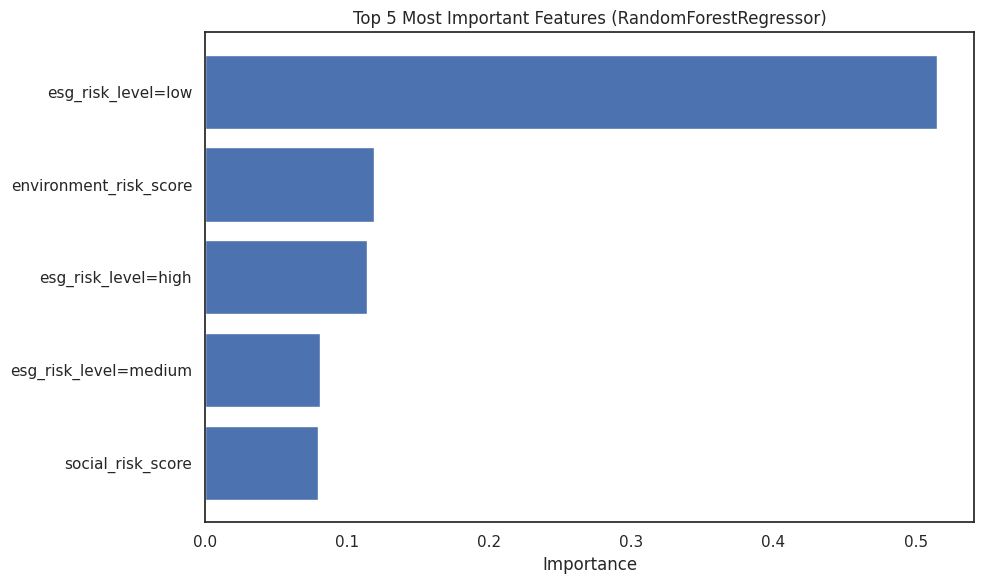

In [58]:
top5= feature_importance_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top5['Feature'], top5['Importance'])
plt.xlabel("Importance")
plt.title("Top 5 Most Important Features (RandomForestRegressor)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

In [59]:
r_squared_rf = r2_score(y_test, rf_model.predict(X_test))
r_squared_rf

0.9197237556805034

### 4.1.2 XGBoost

`n_estimators`  

In [71]:
n_estimators = range(10, 210, 10)# from 10 to 210 with 20 steps
rmse_list = []
r2_list = []

for n in n_estimators:
   model = XGBRegressor(
    eta=0.1,
    n_estimators=n,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    objective='reg:squarederror'
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"n_estimators: {n} : RMSE: {rmse:.5f}: R squared : {r_squared}")

n_estimators: 10 : RMSE: 4.98390: R squared : 0.5416969748374408
n_estimators: 20 : RMSE: 3.56556: R squared : 0.7654305872463163
n_estimators: 30 : RMSE: 2.65373: R squared : 0.870063921684724
n_estimators: 40 : RMSE: 2.13101: R squared : 0.9162109443692699
n_estimators: 50 : RMSE: 1.78060: R squared : 0.9415012187452623
n_estimators: 60 : RMSE: 1.56968: R squared : 0.9545393097498116
n_estimators: 70 : RMSE: 1.43474: R squared : 0.962019707420834
n_estimators: 80 : RMSE: 1.34843: R squared : 0.9664514544709168
n_estimators: 90 : RMSE: 1.29549: R squared : 0.9690342715414844
n_estimators: 100 : RMSE: 1.25686: R squared : 0.9708534388235749
n_estimators: 110 : RMSE: 1.23026: R squared : 0.9720741798185788
n_estimators: 120 : RMSE: 1.21320: R squared : 0.972843113835457
n_estimators: 130 : RMSE: 1.19851: R squared : 0.9734969430652868
n_estimators: 140 : RMSE: 1.18625: R squared : 0.9740362173108309
n_estimators: 150 : RMSE: 1.17335: R squared : 0.9745976934738136
n_estimators: 160 : RM

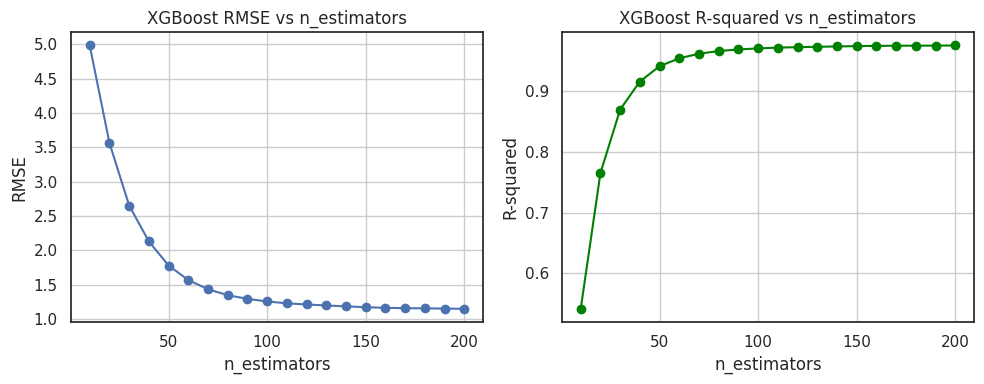

In [72]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, rmse_list, marker='o')
plt.title('XGBoost RMSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators, r2_list, marker='o', color='green')
plt.title('XGBoost R-squared vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best n_estimators --> 200

`eta`

controls the step size at each boosting iteration

In [73]:
eta = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
rmse_list = []
r2_list = []

for e in eta:
   model = XGBRegressor(
    eta=e,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    objective='reg:squarederror'
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"eta: {e} : RMSE: {rmse:.5f}: R squared : {r_squared}")

eta: 0.001 : RMSE: 1.15012: R squared : 0.9755937339408407
eta: 0.01 : RMSE: 1.15012: R squared : 0.9755937339408407
eta: 0.1 : RMSE: 1.15012: R squared : 0.9755937339408407
eta: 0.2 : RMSE: 1.15012: R squared : 0.9755937339408407
eta: 0.3 : RMSE: 1.15012: R squared : 0.9755937339408407
eta: 0.4 : RMSE: 1.15012: R squared : 0.9755937339408407
eta: 0.5 : RMSE: 1.15012: R squared : 0.9755937339408407


`learning_rate`

In [74]:
learning_rate = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
rmse_list = []
r2_list = []

for lr in learning_rate:
   model = XGBRegressor(
    eta=0.1,
    n_estimators=200,
    learning_rate=lr,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    objective='reg:squarederror'
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"learning_rate: {lr} : RMSE: {rmse:.5f}: R squared : {r_squared}")

learning_rate: 0.001 : RMSE: 6.28791: R squared : 0.2704965358614655
learning_rate: 0.01 : RMSE: 2.16220: R squared : 0.9137405650613396
learning_rate: 0.05 : RMSE: 1.15012: R squared : 0.9755937339408407
learning_rate: 0.1 : RMSE: 1.07975: R squared : 0.9784887953044717
learning_rate: 0.2 : RMSE: 1.14928: R squared : 0.9756291968295105
learning_rate: 0.3 : RMSE: 1.22001: R squared : 0.9725374992777581
learning_rate: 0.4 : RMSE: 1.22536: R squared : 0.9722960415516804
learning_rate: 0.5 : RMSE: 1.30785: R squared : 0.9684404294629565


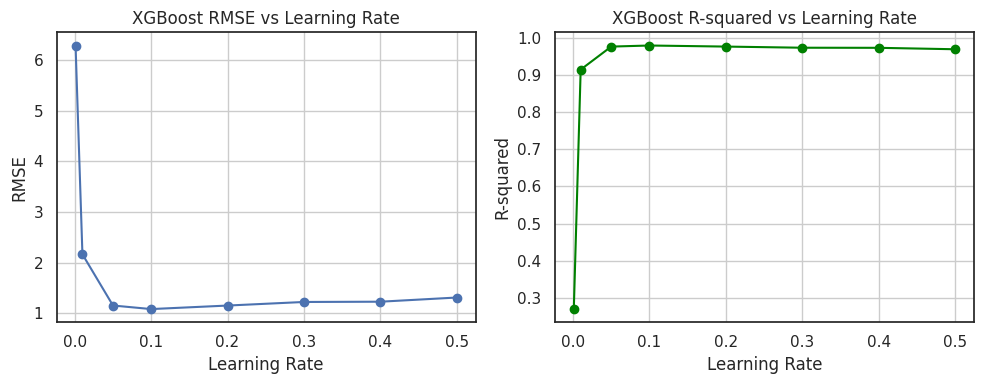

In [75]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(learning_rate, rmse_list, marker='o')
plt.title('XGBoost RMSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(learning_rate, r2_list, marker='o', color='green')
plt.title('XGBoost R-squared vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best learning_rate --> 0.1

`max_depth`

In [76]:
max_depth = range(1,21,1)
rmse_list = []
r2_list = []

for d in max_depth:
   model = XGBRegressor(
    eta=0.1,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=d,
    subsample=0.8,
    random_state=42,
    objective='reg:squarederror'
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"max_depth: {d} : RMSE: {rmse:.5f}: R squared : {r_squared}")

max_depth: 1 : RMSE: 1.30566: R squared : 0.9685459693874967
max_depth: 2 : RMSE: 0.96040: R squared : 0.982981494843242
max_depth: 3 : RMSE: 0.96578: R squared : 0.9827903705001091
max_depth: 4 : RMSE: 0.98548: R squared : 0.9820810836380969
max_depth: 5 : RMSE: 1.07099: R squared : 0.978836610035549
max_depth: 6 : RMSE: 1.07975: R squared : 0.9784887953044717
max_depth: 7 : RMSE: 1.16177: R squared : 0.9750966272765758
max_depth: 8 : RMSE: 1.17222: R squared : 0.97464675107111
max_depth: 9 : RMSE: 1.14498: R squared : 0.9758114281612854
max_depth: 10 : RMSE: 1.19032: R squared : 0.9738579338317092
max_depth: 11 : RMSE: 1.19871: R squared : 0.9734880633239968
max_depth: 12 : RMSE: 1.20458: R squared : 0.9732277538830353
max_depth: 13 : RMSE: 1.17597: R squared : 0.9744843774336891
max_depth: 14 : RMSE: 1.20291: R squared : 0.9733020239986417
max_depth: 15 : RMSE: 1.20089: R squared : 0.9733912688978197
max_depth: 16 : RMSE: 1.19975: R squared : 0.9734420345819369
max_depth: 17 : RMSE:

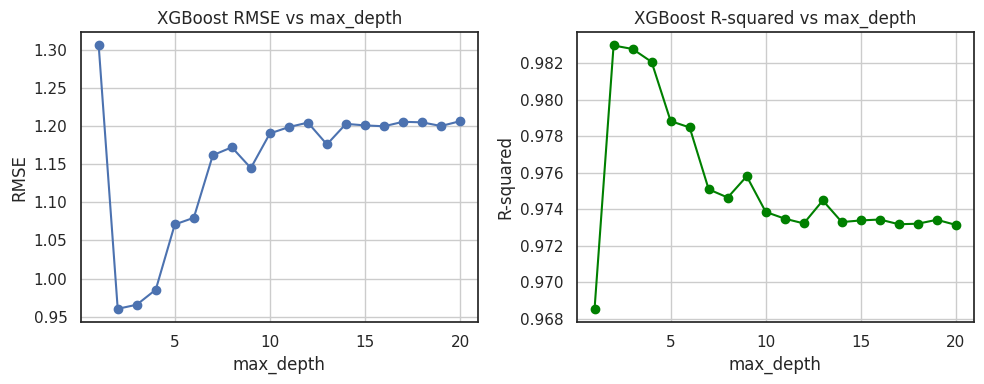

In [77]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth, rmse_list, marker='o')
plt.title('XGBoost RMSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_depth, r2_list, marker='o', color='green')
plt.title('XGBoost R-squared vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best max_depth --> 2

`subsample`

controls the fraction of training data randomly sampled for each boosting iteration

In [78]:
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
max_depth = range(1,21,1)
rmse_list = []
r2_list = []

for s in subsample:
   model = XGBRegressor(
    eta=0.1,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=2,
    subsample=s,
    random_state=42,
    objective='reg:squarederror'
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"subsample: {s} : RMSE: {rmse:.5f}: R squared : {r_squared}")

subsample: 0.5 : RMSE: 0.93999: R squared : 0.9836970789638424
subsample: 0.6 : RMSE: 0.92064: R squared : 0.9843615357397288
subsample: 0.7 : RMSE: 1.03380: R squared : 0.9802807504381457
subsample: 0.8 : RMSE: 0.96040: R squared : 0.982981494843242
subsample: 0.9 : RMSE: 0.99458: R squared : 0.9817488346632183
subsample: 1.0 : RMSE: 1.13631: R squared : 0.9761763974468084


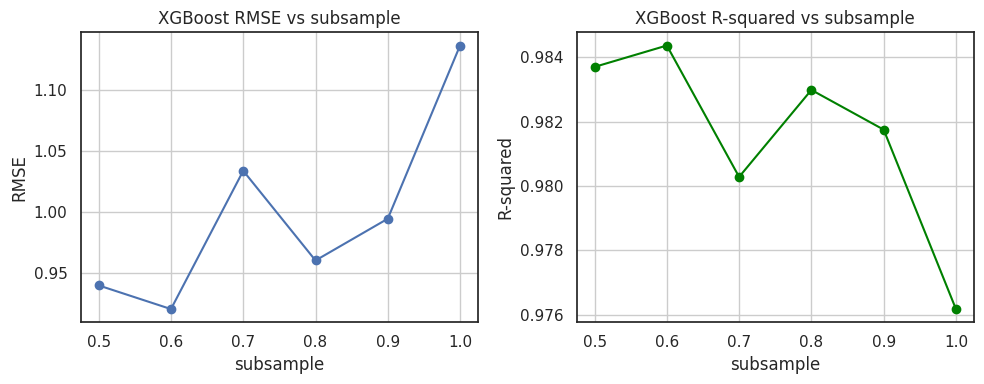

In [79]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(subsample, rmse_list, marker='o')
plt.title('XGBoost RMSE vs subsample')
plt.xlabel('subsample')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(subsample, r2_list, marker='o', color='green')
plt.title('XGBoost R-squared vs subsample')
plt.xlabel('subsample')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best subsample --> 0.6


Final XGBRegressor model

In [80]:
xgb_model = XGBRegressor(eta=0.1, n_estimators=200,
                         learning_rate=0.1,
                         max_depth=2,
                         subsample=0.6,
                         random_state=42,
                         objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None, ...)

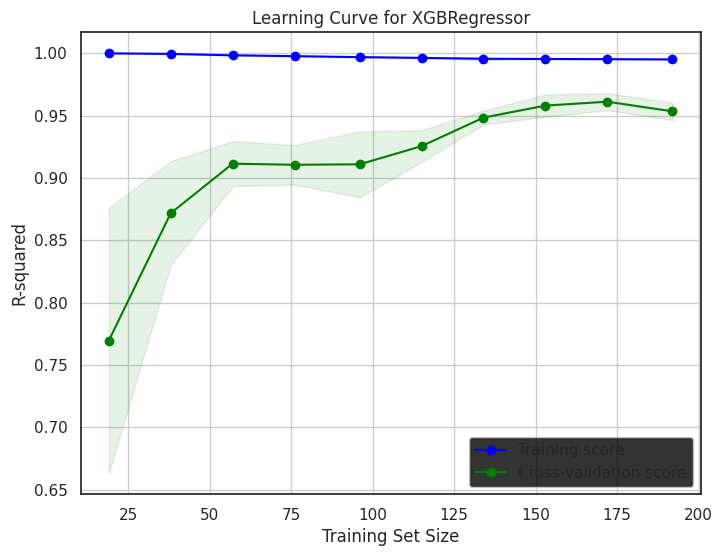

In [81]:
# Generate learning curve data using training data
train_sizes, train_scores_xgb, val_scores_xgb = learning_curve(
    xgb_model, X_train, y_train,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # use R-squared metric
    train_sizes=np.linspace(0.1, 1.0, 10),  # different training set sizes
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std for smoothing the curves
train_mean = np.mean(train_scores_xgb, axis=1)
train_std = np.std(train_scores_xgb, axis=1)
val_mean = np.mean(val_scores_xgb, axis=1)
val_std = np.std(val_scores_xgb, axis=1)

# Plot learning curves
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Learning Curve for XGBRegressor')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend(loc='best')
plt.grid(True)
plt.show()

High possibility of overfitting but in general R squared is high

In [82]:
feature_importances = xgb_model.feature_importances_
feature_names = dv.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)

                       Feature  Importance
8           esg_risk_level=low    0.318562
9        esg_risk_level=medium    0.188289
7          esg_risk_level=high    0.093027
11       esg_risk_level=severe    0.077909
10   esg_risk_level=negligible    0.065260
..                         ...         ...
126  sector=financial_services    0.000000
128         sector=industrials    0.000000
129         sector=real_estate    0.000000
130          sector=technology    0.000000
131           sector=utilities    0.000000

[133 rows x 2 columns]


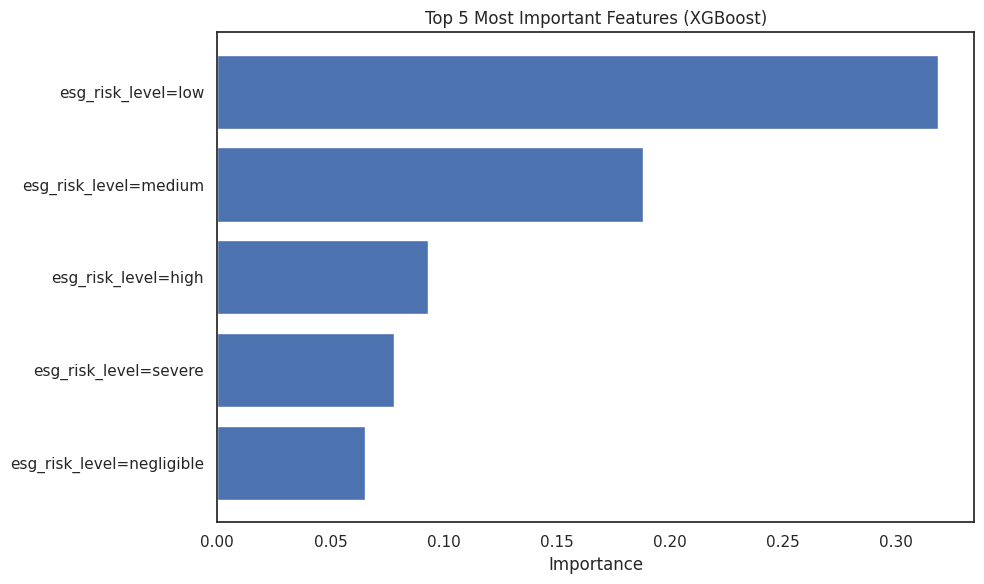

In [83]:
top5 = feature_importance_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top5['Feature'], top5['Importance'])
plt.xlabel("Importance")
plt.title("Top 5 Most Important Features (XGBoost)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

In [84]:
r_squared_xgb = r2_score(y_test, xgb_model.predict(X_test))
r_squared

0.9761763974468084

### 4.1.3 Gradient Boost

`Learning rate`

In [85]:
learning_rate = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
rmse_list = []
r2_list = []

for lr in learning_rate:
   model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=lr,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"learning_rate: {lr} : RMSE: {rmse:.5f}: R squared : {r_squared}")

learning_rate: 0.001 : RMSE: 6.17252: R squared : 0.2970241179557679
learning_rate: 0.01 : RMSE: 1.86904: R squared : 0.9355456421169532
learning_rate: 0.05 : RMSE: 1.24874: R squared : 0.9712286772436698
learning_rate: 0.1 : RMSE: 1.17756: R squared : 0.9744154590317389
learning_rate: 0.2 : RMSE: 1.17717: R squared : 0.9744322510023609
learning_rate: 0.3 : RMSE: 1.21825: R squared : 0.9726166711639376
learning_rate: 0.4 : RMSE: 1.40188: R squared : 0.963739419281125
learning_rate: 0.5 : RMSE: 1.50744: R squared : 0.9580727521631075


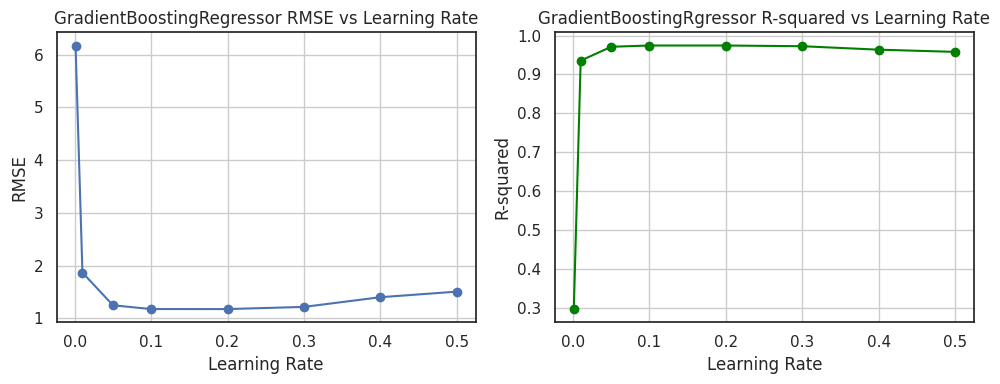

In [86]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(learning_rate, rmse_list, marker='o')
plt.title('GradientBoostingRegressor RMSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(learning_rate, r2_list, marker='o', color='green')
plt.title('GradientBoostingRgressor R-squared vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best learning rate --> 0.2




In [87]:
n_estimators = range(10, 210, 10)# from 10 to 210 with 20 steps
rmse_list = []
r2_list = []

for n in n_estimators:
   model = GradientBoostingRegressor(
    n_estimators=n,
    learning_rate=0.2,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"n_estimators: {n} : RMSE: {rmse:.5f}: R squared : {r_squared}")

n_estimators: 10 : RMSE: 1.64140: R squared : 0.9502899684088836
n_estimators: 20 : RMSE: 1.24115: R squared : 0.9715774985717522
n_estimators: 30 : RMSE: 1.19009: R squared : 0.9738678089524666
n_estimators: 40 : RMSE: 1.18255: R squared : 0.9741978015067942
n_estimators: 50 : RMSE: 1.18124: R squared : 0.9742551889246496
n_estimators: 60 : RMSE: 1.17913: R squared : 0.974346834543962
n_estimators: 70 : RMSE: 1.17697: R squared : 0.9744410342301963
n_estimators: 80 : RMSE: 1.17743: R squared : 0.9744210780581679
n_estimators: 90 : RMSE: 1.17782: R squared : 0.9744039856298533
n_estimators: 100 : RMSE: 1.17869: R squared : 0.9743660112727172
n_estimators: 110 : RMSE: 1.17804: R squared : 0.9743945917521123
n_estimators: 120 : RMSE: 1.17833: R squared : 0.9743817777169188
n_estimators: 130 : RMSE: 1.17852: R squared : 0.9743736827852483
n_estimators: 140 : RMSE: 1.17780: R squared : 0.9744046357819525
n_estimators: 150 : RMSE: 1.17786: R squared : 0.9744020752309664
n_estimators: 160 : 

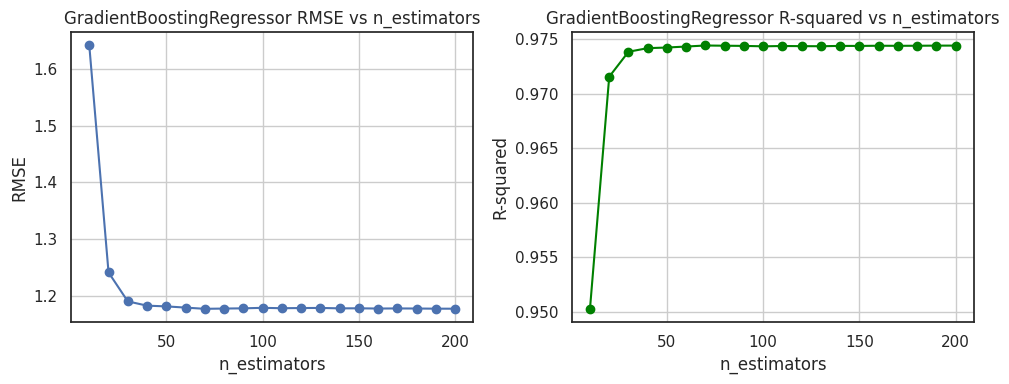

In [88]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, rmse_list, marker='o')
plt.title('GradientBoostingRegressor RMSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators, r2_list, marker='o', color='green')
plt.title('GradientBoostingRegressor R-squared vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best n_estimators --> 200



In [89]:
max_depth = range(1,21,1)
rmse_list = []
r2_list = []

for d in max_depth:
   model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=d,
    subsample=0.8,
    random_state=42,
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"max_depth: {d} : RMSE: {rmse:.5f}: R squared : {r_squared}")

max_depth: 1 : RMSE: 2.23206: R squared : 0.908076243687757
max_depth: 2 : RMSE: 1.42272: R squared : 0.9626529754494239
max_depth: 3 : RMSE: 1.28242: R squared : 0.9696560382061381
max_depth: 4 : RMSE: 1.17365: R squared : 0.9745850112214683
max_depth: 5 : RMSE: 1.19186: R squared : 0.9737902114767709
max_depth: 6 : RMSE: 1.28474: R squared : 0.9695461031670914
max_depth: 7 : RMSE: 1.30762: R squared : 0.9684514248302202
max_depth: 8 : RMSE: 1.37611: R squared : 0.9650603871477961
max_depth: 9 : RMSE: 1.42820: R squared : 0.9623646963693038
max_depth: 10 : RMSE: 1.36115: R squared : 0.9658158800199571
max_depth: 11 : RMSE: 1.36717: R squared : 0.9655128566651747
max_depth: 12 : RMSE: 1.40592: R squared : 0.9635297444528634
max_depth: 13 : RMSE: 1.35985: R squared : 0.9658812029875008
max_depth: 14 : RMSE: 1.39681: R squared : 0.9640008423521178
max_depth: 15 : RMSE: 1.42095: R squared : 0.9627460163743998
max_depth: 16 : RMSE: 1.40839: R squared : 0.9634014780468045
max_depth: 17 : RM

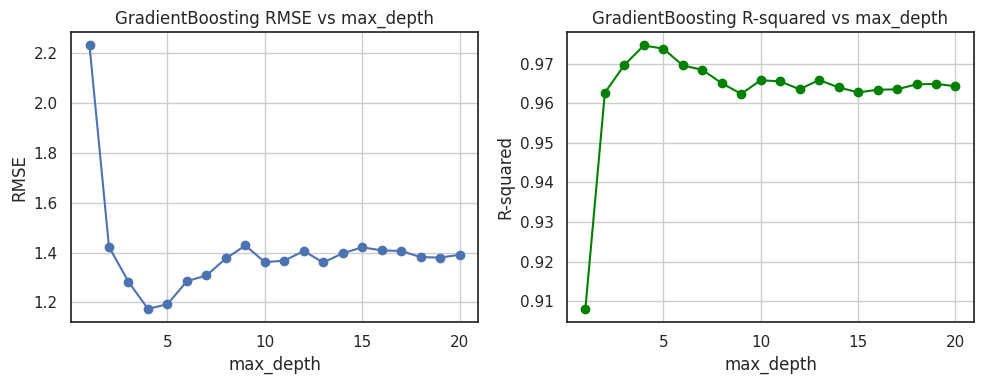

In [90]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(max_depth, rmse_list, marker='o')
plt.title('GradientBoosting RMSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_depth, r2_list, marker='o', color='green')
plt.title('GradientBoosting R-squared vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best max_depth --> 4

In [91]:
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
rmse_list = []
r2_list = []

for s in subsample:
   model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=4,
    subsample=s,
    random_state=42,
)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_val)

   # Evaluate the model
   rmse = root_mean_squared_error(y_val, y_pred)
   r_squared = r2_score(y_val, y_pred)

   rmse_list.append(rmse)
   r2_list.append(r_squared)

   print(f"subsample: {s} : RMSE: {rmse:.5f}: R squared : {r_squared}")

subsample: 0.5 : RMSE: 1.16629: R squared : 0.9749025387011049
subsample: 0.6 : RMSE: 1.31602: R squared : 0.968045042323858
subsample: 0.7 : RMSE: 1.34397: R squared : 0.9666732427353851
subsample: 0.8 : RMSE: 1.17120: R squared : 0.9746907436311546
subsample: 0.9 : RMSE: 1.14005: R squared : 0.9760192227953062
subsample: 1.0 : RMSE: 1.27482: R squared : 0.9700144542618588


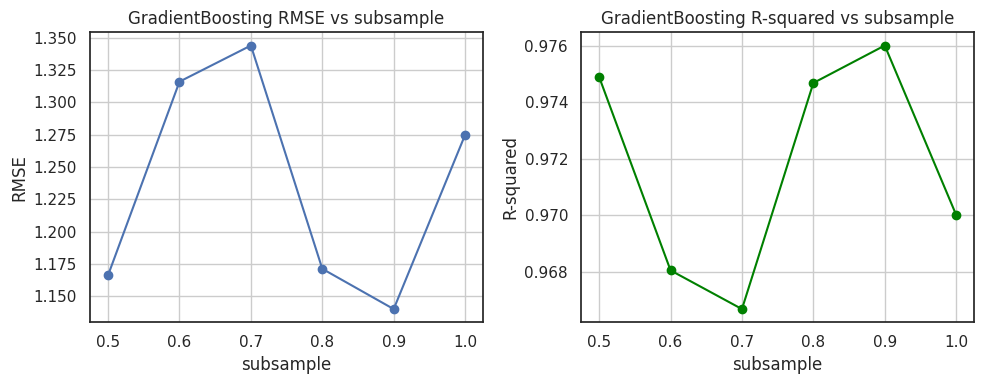

In [92]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(subsample, rmse_list, marker='o')
plt.title('GradientBoosting RMSE vs subsample')
plt.xlabel('subsample')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(subsample, r2_list, marker='o', color='green')
plt.title('GradientBoosting R-squared vs subsample')
plt.xlabel('subsample')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

Best subsample --> 0.9

GradientBoostingRegressor final model

In [93]:
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=4,
    subsample=0.9,
    random_state=42,
)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=200,
                          random_state=42, subsample=0.9)

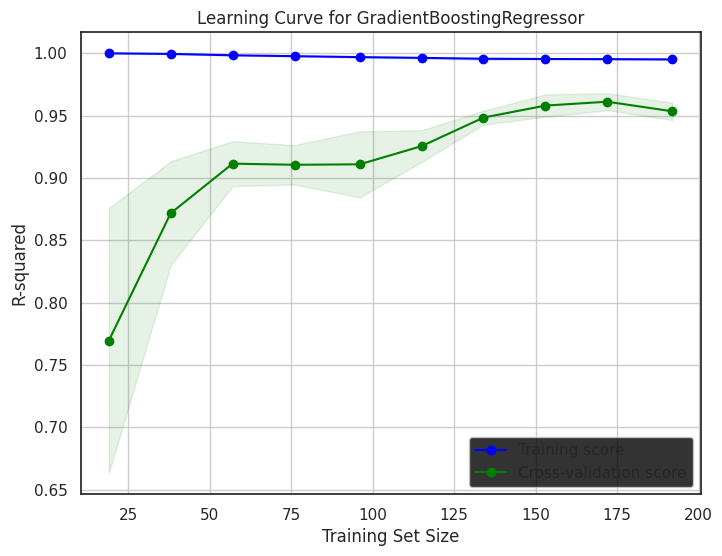

In [94]:
# Generate learning curve data using training data
train_sizes, train_scores_gb, val_scores_gb = learning_curve(
    gb_model, X_train, y_train,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # use R-squared metric
    train_sizes=np.linspace(0.1, 1.0, 10),  # different training set sizes
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std for smoothing the curves
train_mean_gb = np.mean(train_scores_gb, axis=1)
train_std_gb = np.std(train_scores_gb, axis=1)
val_mean_gb = np.mean(val_scores_gb, axis=1)
val_std_gb = np.std(val_scores_gb, axis=1)

# Plot learning curves
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Learning Curve for GradientBoostingRegressor')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [95]:
# Get feature importances
feature_importances = gb_model.feature_importances_
feature_names = dv.get_feature_names_out()

# Create dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display all importances
print(feature_importance_df)

                                          Feature  Importance
8                              esg_risk_level=low    0.439656
6                          environment_risk_score    0.169603
7                             esg_risk_level=high    0.147482
132                             social_risk_score    0.128065
12                          governance_risk_score    0.037554
..                                            ...         ...
112                              industry=tobacco    0.000000
101  industry=semiconductor_equipment_&_materials    0.000000
113                  industry=tools_&_accessories    0.000000
110                                industry=steel    0.000000
119          industry=utilities_-_regulated_water    0.000000

[133 rows x 2 columns]


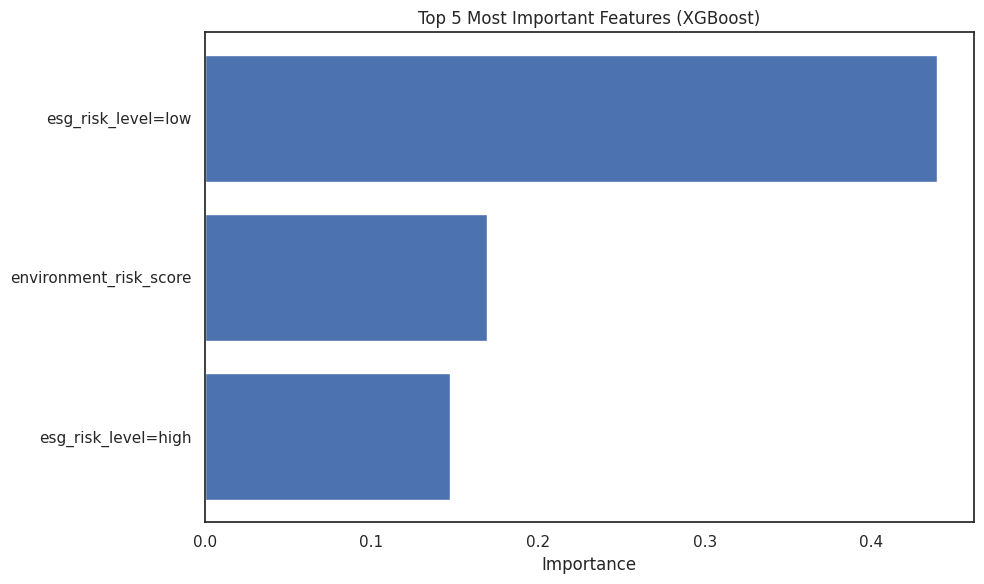

In [96]:
top5 = feature_importance_df.head(3)

plt.figure(figsize=(10, 6))
plt.barh(top5['Feature'], top5['Importance'])
plt.xlabel("Importance")
plt.title("Top 5 Most Important Features (XGBoost)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

In [97]:
r_squared_gb = r2_score(y_val, gb_model.predict(X_val))
r_squared_gb

0.9762918188648952

### 4.2 Learning Curve comparaison of three models

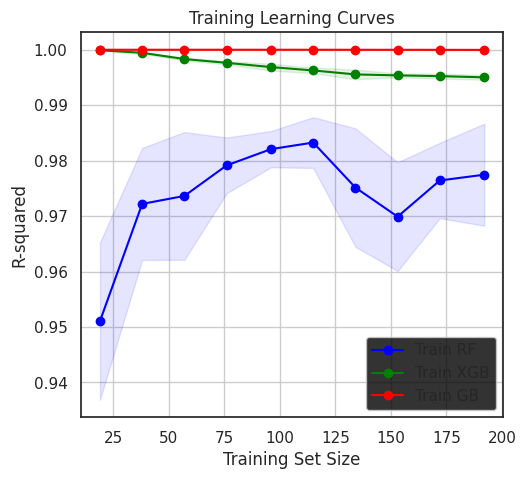

In [98]:

def get_learning_curve_data(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    return train_sizes, train_mean, train_std, val_mean, val_std

# Get learning curve data for each model
train_sizes_rf, train_mean_rf, train_std_rf, val_mean_rf, val_std_rf = get_learning_curve_data(rf_model, X_train, y_train)
train_sizes_xgb, train_mean_xgb, train_std_xgb, val_mean_xgb, val_std_xgb = get_learning_curve_data(xgb_model, X_train, y_train)
train_sizes_gb, train_mean_gb, train_std_gb, val_mean_gb, val_std_gb = get_learning_curve_data(gb_model, X_train, y_train)

# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes_rf, train_mean_rf, 'o-', color='blue', label='Train RF')
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf,
                 alpha=0.1, color='blue')
plt.plot(train_sizes_xgb, train_mean_xgb, 'o-', color='green', label='Train XGB')
plt.fill_between(train_sizes_xgb, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb,
                 alpha=0.1, color='green')
plt.plot(train_sizes_gb, train_mean_gb, 'o-', color='red', label='Train GB')
plt.fill_between(train_sizes_gb, train_mean_gb - train_std_gb, train_mean_gb + train_std_gb,
                 alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Training Learning Curves')
plt.legend()
plt.grid(True)

* The Random Forest regressor model demonstrates strong and consistent performance across all training set sizes, indicating a good fit and stable learning without excessive complexity. In contrast, the XGBoost model shows signs of overfitting, and the Gradient Boosting regressor yields lower r squared
  scores. Their validation performance does not match their training performance,

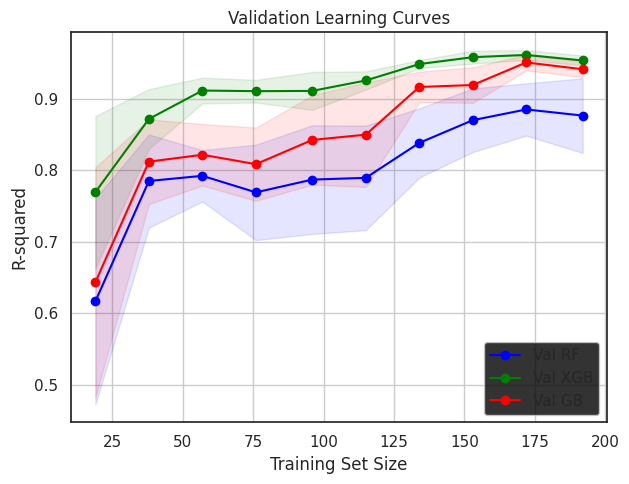

In [99]:
# Plot validation curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(train_sizes_rf, val_mean_rf, 'o-', color='blue', label='Val RF')
plt.fill_between(train_sizes_rf, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf,
                 alpha=0.1, color='blue')
plt.plot(train_sizes_xgb, val_mean_xgb, 'o-', color='green', label='Val XGB')
plt.fill_between(train_sizes_xgb, val_mean_xgb - val_std_xgb, val_mean_xgb + val_std_xgb,
                 alpha=0.1, color='green')
plt.plot(train_sizes_gb, val_mean_gb, 'o-', color='red', label='Val GB')
plt.fill_between(train_sizes_gb, val_mean_gb - val_std_gb, val_mean_gb + val_std_gb,
                 alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Validation Learning Curves')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

* Despite the differences in training behavior, all three models achieve similar r_squared scores on the validation sets, suggesting comparable generalization abilities. The close validation scores imply that although XGB and GB overfit on training data, careful tuning or regularization might improve their real-world predictive power.

### 4.3 Cross validation: Selected model

Furthermore, we evaluate our model using k-fold cross-validation to assess its performance across multiple validation subsets, enabling us to visualize the variation in R-squared scores and gain deeper insights into the model’s generalization ability.

In [100]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []

for train_index, val_index in kf.split(X_full_train):
    X_train_fold, X_val_fold = X_full_train[train_index], X_full_train[val_index]
    y_train_fold, y_val_fold = y_full_train[train_index], y_full_train[val_index]

    rf_model = RandomForestRegressor(n_estimators=24,
                                     max_depth=15,
                                     min_samples_leaf=1,
                                     n_jobs=-1,
                                     random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    y_pred = rf_model.predict(X_val_fold)
    score = r2_score(y_val_fold, y_pred)
    r2_scores.append(score)

print(f"Cross-validated R-squared scores: {r2_scores}")

Cross-validated R-squared scores: [0.9342245454871426, 0.9177911297311923, 0.961897850452313, 0.8546703125500098, 0.9138746048285042]


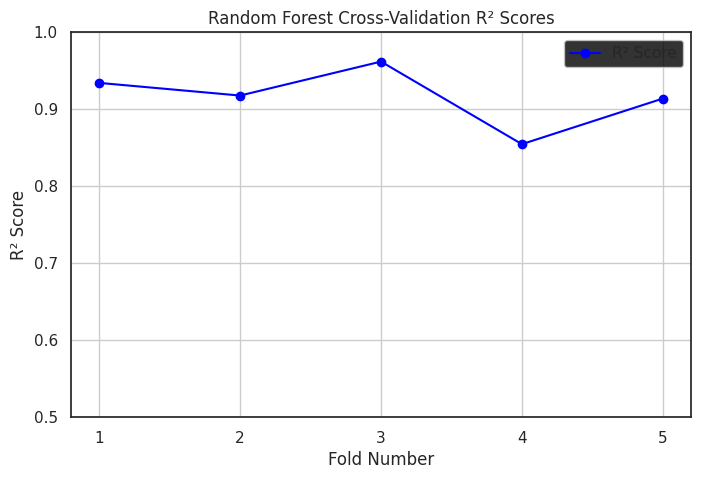

In [101]:
folds = np.arange(1, len(r2_scores) + 1)

plt.figure(figsize=(8, 5))
plt.plot(folds, r2_scores, marker='o', linestyle='-', color='blue', label='R² Score')
plt.xticks(folds)
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('Random Forest Cross-Validation R² Scores')
plt.ylim([0.5, 1])
plt.grid(True)
plt.legend()
plt.show()

* The Random Forest regressor gives very similar R² scores across all folds, all in range of 0.99. This means the model is very consistent and performs very well in predicting the target across different parts of the data.

## Conclusion:
* Overall, RF currently balances bias and variance effectively on training data, while XGB and GB need further adjustments to reduce overfitting and enhance validation performance.

# 5. Testing the selected model: RandomForestRegressor

* After selecting the Random Forest Regressor as the final model for our case, we proceed to evaluate its performance on the test data. We will generate predictions, compare them to actual values, and analyze relevant metrics to assess the model's accuracy and reliability.

New data not from the dataset

In [102]:
new_data = {
      "sector": "energy",
      "industry": "oil_and_gas_exploration",
      "controversy_level": "high_controversy_level",
      "esg_risk_level": "high",
      "environment_risk_score": 15.2,
      "governance_risk_score": 10.5,
      "social_risk_score": 12.0,
      "controversy_score": 4.5,
      "esg_risk_percentile": 85.0
    }

In [103]:
X_input = dv.transform([new_data])

# Predict using trained Random Forest model
prediction = rf_model.predict(X_input)
actual_value = 42.2
print(f"Predicted total ESG risk score: {prediction[0]}, Actual total ESG risk score: {actual_value}")

Predicted total ESG risk score: 35.29166666666667, Actual total ESG risk score: 42.2


In [104]:
r_squared = r2_score(y_test, rf_model.predict(X_test))
r_squared

0.9373695588791569

* This prediction demonstrates that our selected Random Forest model excels in predicting the ESG risk score for the given company, achieving a high R-squared value. This indicates the model explains a large proportion of the variance in the data and provides accurate, reliable predictions.